In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

timestamps_ms = []
distances = []
controls = []
left_pwms = []
right_pwms = []

In [2]:
def parse_str2data(ss):
    if ss.count('|') < 3:
        # view as normal message
        print(ss)
        return
    # parse to recorded data
    idx, data = ss.split(':')
    timestamp, distance, ctrl, left_ctrl, right_ctrl, left_pwm, right_pwm \
        = data.split('|')
    if int(timestamp) == 0 and int(distance) == 0 and int(ctrl) == 0:
        return
    timestamps_ms.append(int(timestamp))
    distances.append(int(distance))
    controls.append(int(ctrl))
    left_pwms.append(int(left_pwm))
    right_pwms.append(int(right_pwm))
    
    # print(f"time: {timestamp}  distance: {distance}  control: {ctrl}  left_pwm: {left_pwm}  right_pwm: {right_pwm}")

def notification_handler(uuid, byte_array):
    data_str = ble.bytearray_to_string(byte_array)
    parse_str2data(data_str)

In [3]:
def plot_graph():
    # 转换时间戳为秒（如果需要）
    timestamps_s = [t / 1000.0 for t in timestamps_ms]
    
    # 创建图表和轴
    fig, ax1 = plt.subplots()
    
    # 绘制 distance 曲线
    color = 'tab:red'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Distance', color=color)
    ax1.plot(timestamps_s, distances, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # 实例化一个新的轴，共享同一个X轴
    ax2 = ax1.twinx()  
    
    # 绘制 control 曲线
    color = 'tab:blue'
    ax2.set_ylabel('Control', color=color)  
    ax2.plot(timestamps_s, controls, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    # 给图表加上标题和显示图例
    plt.title('Distance and Control vs. Time')
    
    # 显示图表
    plt.show()

In [4]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

2024-04-10 01:41:52,576 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:89:F0:6B:06:4B
2024-04-10 01:41:55,690 | INFO     |: Connected to C0:89:F0:6B:06:4B


/Users/yangd19/Documents/Code/ECE5160-Code/Lab1/ble_python/base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [5]:
ble.send_command(CMD.PING, "")
s = ble.receive_string(ble.uuid['RX_STRING'])

PONG


In [6]:
ble.send_command(CMD.START_AUTO, "")
timestamps_ms = []
distances = []
controls = []
left_pwms = []
right_pwms = []
s = ble.receive_string(ble.uuid['RX_STRING'])

Succeed: start auto running


In [7]:
ble.send_command(CMD.STOP, "")
s = ble.receive_string(ble.uuid['RX_STRING'])

Succeed: brake and stop auto running


In [8]:
ble.send_command(CMD.GET_HISTORY_DATA, "")

Size of records array: 402


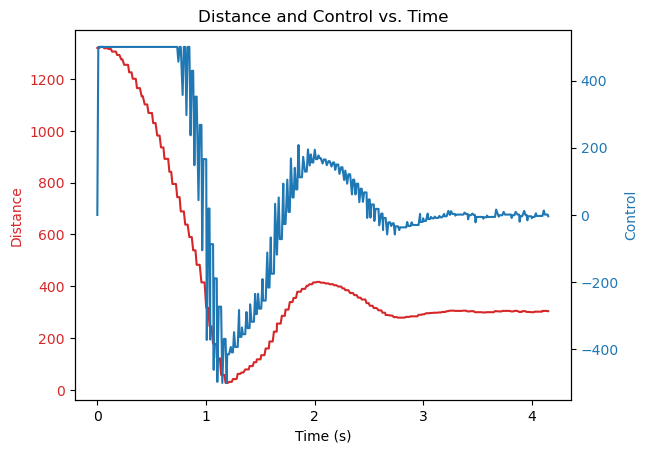

In [11]:
plot_graph()

In [26]:
# ble.send_command(CMD.SET_TWO_CTRL, "125|-220")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [21]:
# ble.send_command(CMD.GET_CURR_DATA, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [9]:
# ble.send_command(CMD.GET_CURR_DATA, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [10]:
# ble.send_command(CMD.SET_TWO_CTRL, "125|-220")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [11]:
# ble.send_command(CMD.STOP, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])